Imports

In [2]:
% matplotlib inline
import shapefile
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib import cm
from datetime import datetime
from ipywidgets import widgets  
from IPython.display import display

import seaborn as sns

Import crimedata and so some small transformations

In [3]:
crimeData = pd.read_csv('train.csv')

crimeData['DateTime'] = crimeData['Dates'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

crimeData['Year'] = crimeData['DateTime'].apply(lambda x: x.year)
crimeData['Month'] = crimeData['DateTime'].apply(lambda x: x.month)
crimeData['Day'] = crimeData['DateTime'].apply(lambda x: x.day)
crimeData['Hour'] = crimeData['DateTime'].apply(lambda x: x.hour)

crimeData

Dates                Category  \
0       2015-05-13 23:53:00                WARRANTS   
1       2015-05-13 23:53:00          OTHER OFFENSES   
2       2015-05-13 23:33:00          OTHER OFFENSES   
3       2015-05-13 23:30:00           LARCENY/THEFT   
4       2015-05-13 23:30:00           LARCENY/THEFT   
5       2015-05-13 23:30:00           LARCENY/THEFT   
6       2015-05-13 23:30:00           VEHICLE THEFT   
7       2015-05-13 23:30:00           VEHICLE THEFT   
8       2015-05-13 23:00:00           LARCENY/THEFT   
9       2015-05-13 23:00:00           LARCENY/THEFT   
10      2015-05-13 22:58:00           LARCENY/THEFT   
11      2015-05-13 22:30:00          OTHER OFFENSES   
12      2015-05-13 22:30:00               VANDALISM   
13      2015-05-13 22:06:00           LARCENY/THEFT   
14      2015-05-13 22:00:00            NON-CRIMINAL   
15      2015-05-13 22:00:00            NON-CRIMINAL   
16      2015-05-13 22:00:00                 ROBBERY   
17      2015-05-13 21:55:00                 ASSAULT   
18      2015-05-13 21:40:00          OTHER OFFENSES   
19      2015-05-13 21:30:00            NON-CRIMINAL   
20      2015-05-13 21:30:00           LARCENY/THEFT   
21      2015-05-13 21:17:00                 ROBBERY   
22      2015-05-13 21:11:00                WARRANTS   
23      2015-05-13 21:11:00            NON-CRIMINAL   
24      2015-05-13 21:10:00           LARCENY/THEFT   
25      2015-05-13 21:00:00            NON-CRIMINAL   
26      2015-05-13 21:00:00           LARCENY/THEFT   
27      2015-05-13 21:00:00           LARCENY/THEFT   
28      2015-05-13 21:00:00           LARCENY/THEFT   
29      2015-05-13 20:56:00          OTHER OFFENSES   
...                     ...                     ...   
878019  2003-01-06 02:37:00          OTHER OFFENSES   
878020  2003-01-06 02:32:00          OTHER OFFENSES   
878021  2003-01-06 02:24:00               VANDALISM   
878022  2003-01-06 02:16:00           VEHICLE THEFT   
878023  2003-01-06 02:15:00           LARCENY/THEFT   
878024  2003-01-06 02:09:00          OTHER OFFENSES   
878025  2003-01-06 02:06:00          OTHER OFFENSES   
878026  2003-01-06 02:06:00                WARRANTS   
878027  2003-01-06 02:00:00                WARRANTS   
878028  2003-01-06 02:00:00                 ASSAULT   
878029  2003-01-06 01:54:00          OTHER OFFENSES   
878030  2003-01-06 01:54:00   SEX OFFENSES FORCIBLE   
878031  2003-01-06 01:50:00                 ASSAULT   
878032  2003-01-06 01:36:00          OTHER OFFENSES   
878033  2003-01-06 01:30:00               VANDALISM   
878034  2003-01-06 01:30:00                TRESPASS   
878035  2003-01-06 00:55:00                 ASSAULT   
878036  2003-01-06 00:55:00           LARCENY/THEFT   
878037  2003-01-06 00:55:00               VANDALISM   
878038  2003-01-06 00:42:00                WARRANTS   
878039  2003-01-06 00:40:00          OTHER OFFENSES   
878040  2003-01-06 00:33:00                 ASSAULT   
878041  2003-01-06 00:31:00          OTHER OFFENSES   
878042  2003-01-06 00:20:00                 ASSAULT   
878043  2003-01-06 00:20:00          OTHER OFFENSES   
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript  DayOfWeek  PdDistrict  \
0                                  WARRANT ARREST  Wednesday    NORTHERN   
1                        TRAFFIC VIOLATION ARREST  Wednesday    NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday    NORTHERN   
3                    GRAND THEFT FROM LOCKED AUTO  Wednesday    NORTHERN   
4                    GRAND THEFT FROM LOCKED AUTO  Wednesday        PARK   
5                  GRAND THEFT FROM UNLOCKED AUTO  Wednesday   INGLESIDE   
6                               STOLEN AUTOMOBILE  Wednesday   INGLESIDE   
7  

Generate a map of incidents for each type of crime

/home/mingram/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


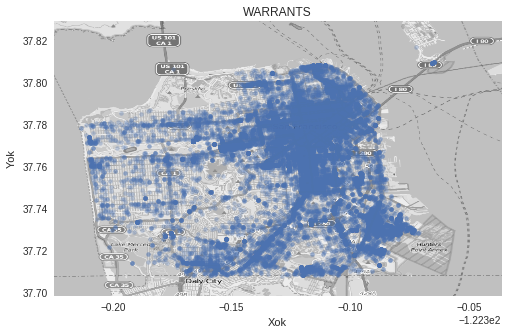

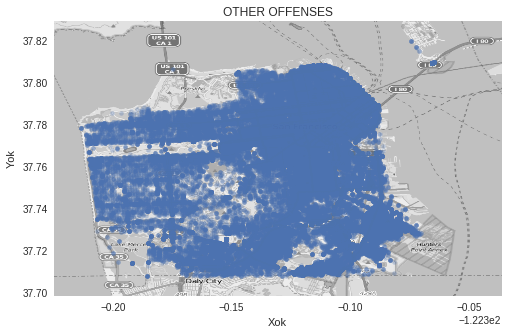

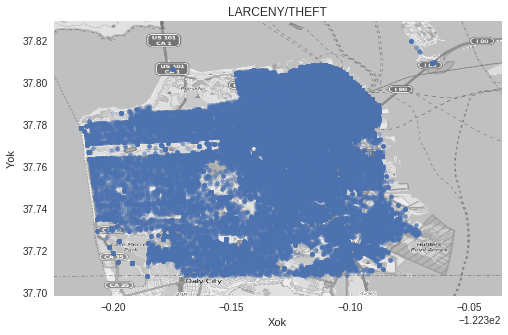

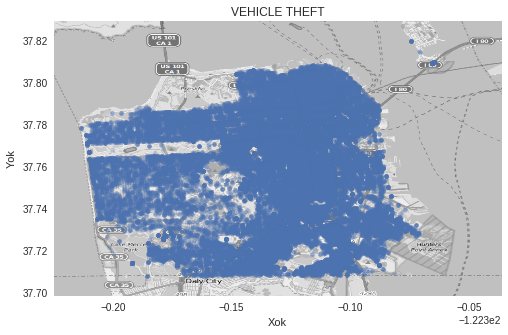

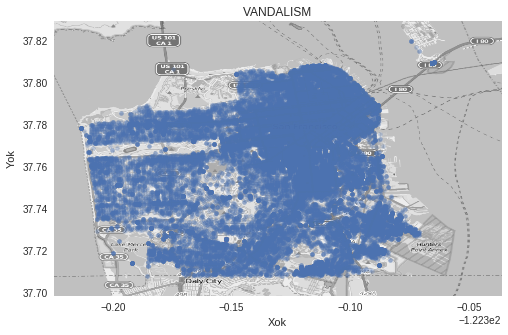

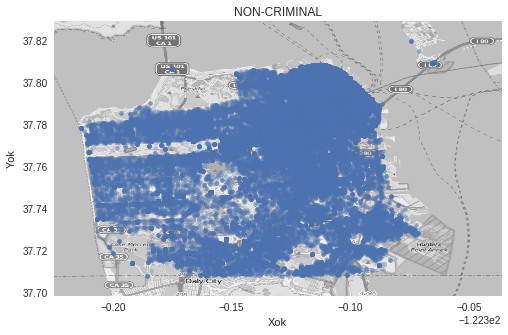

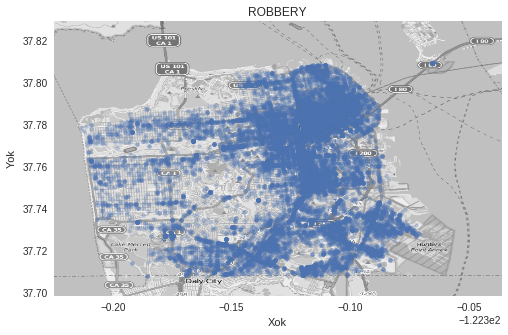

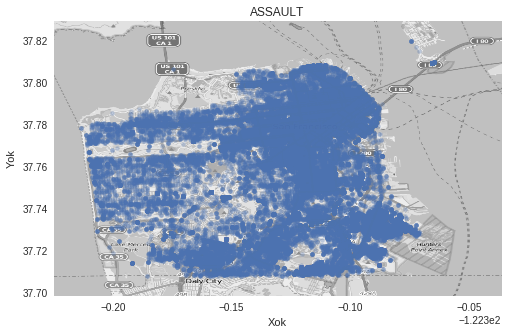

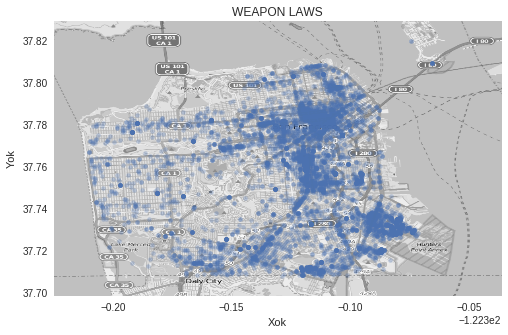

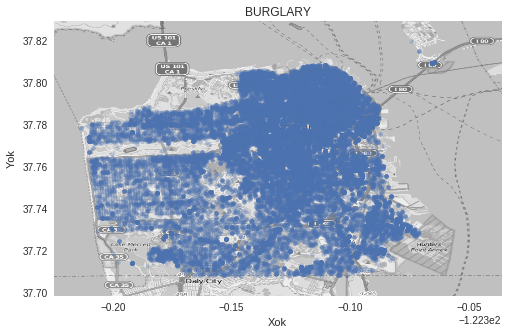

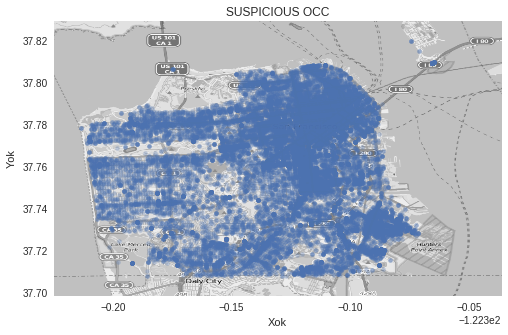

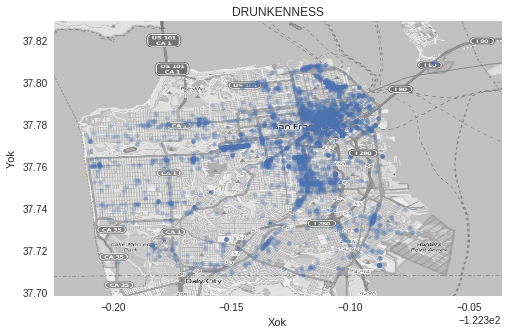

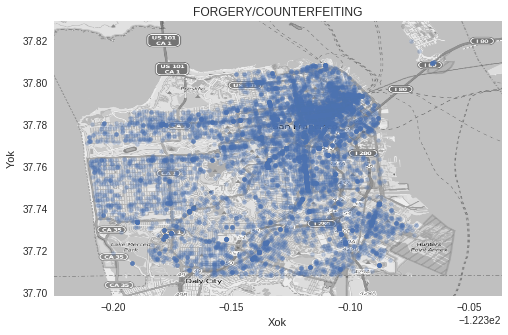

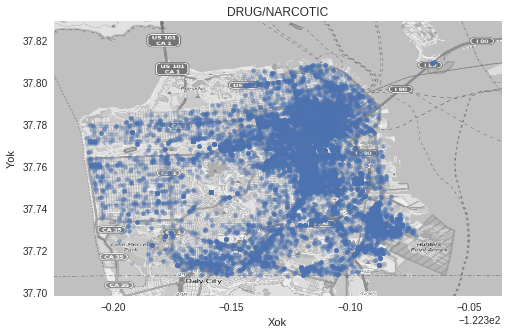

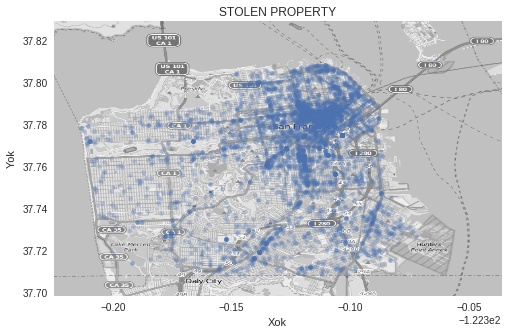

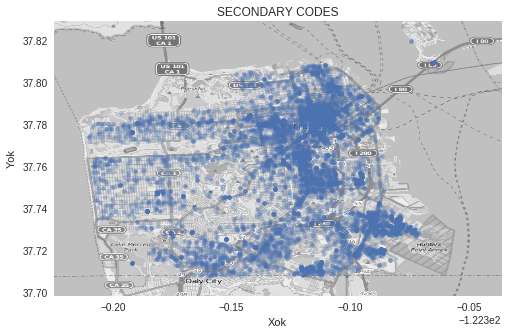

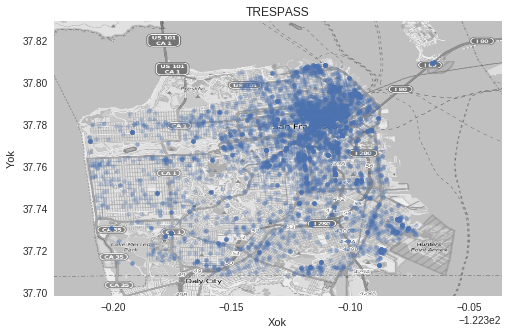

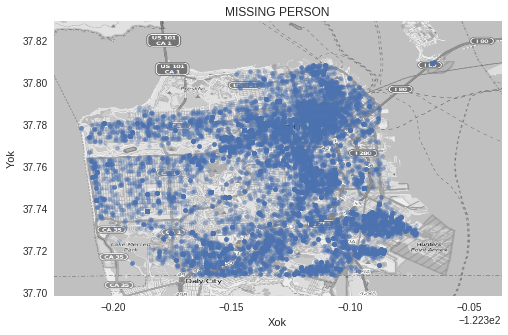

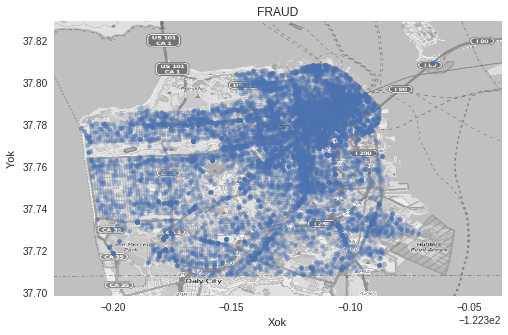

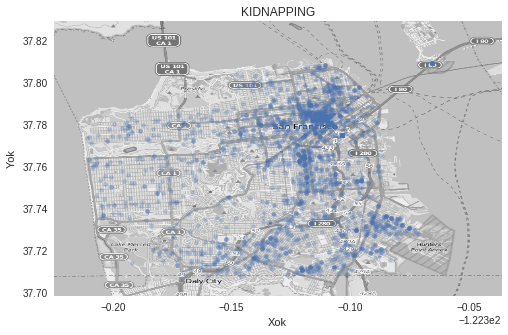

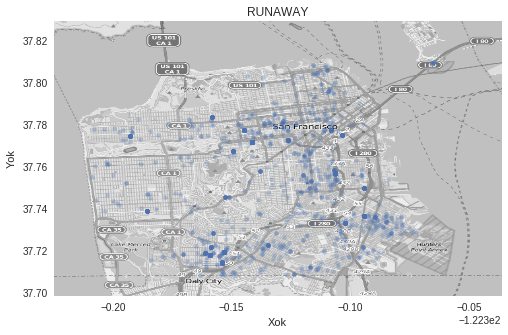

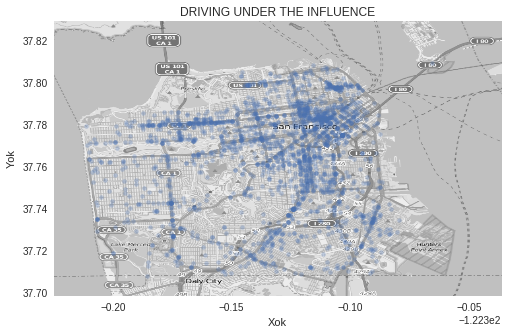

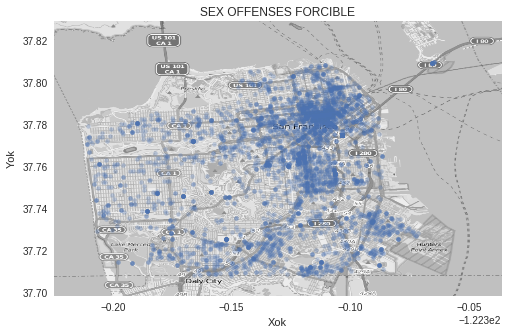

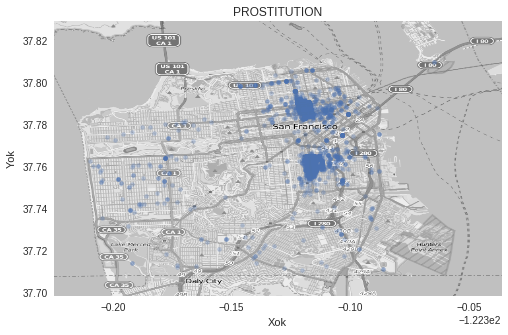

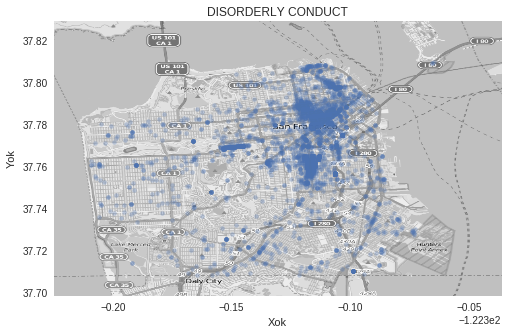

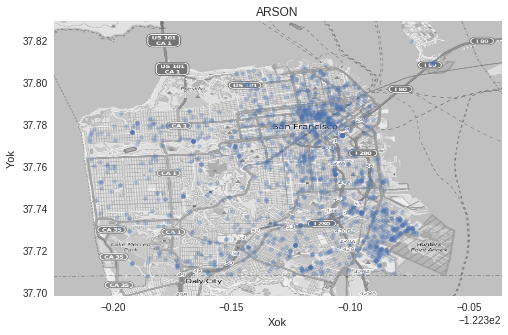

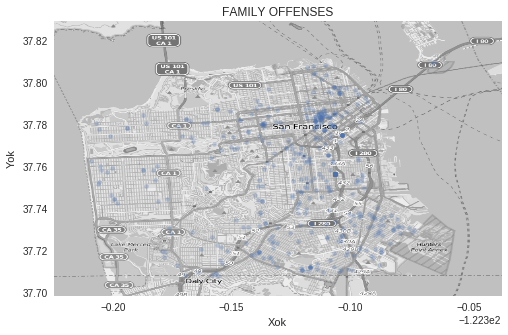

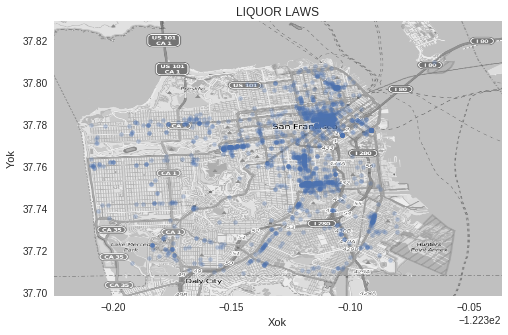

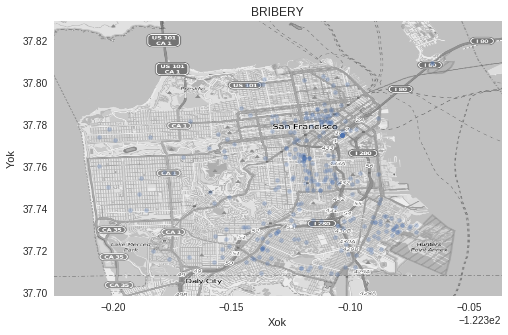

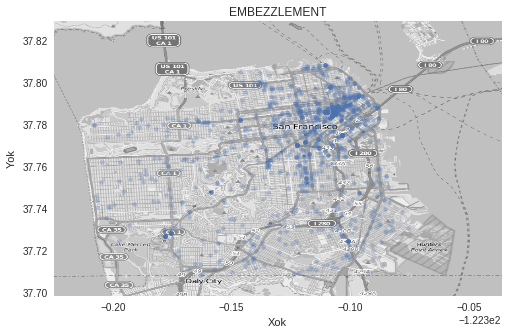

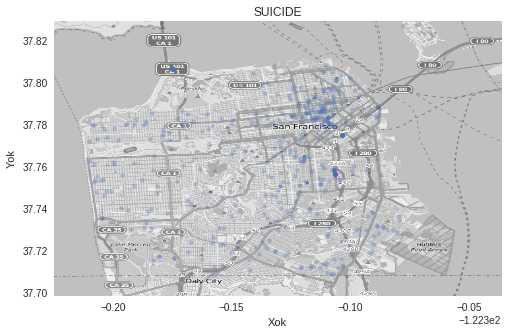

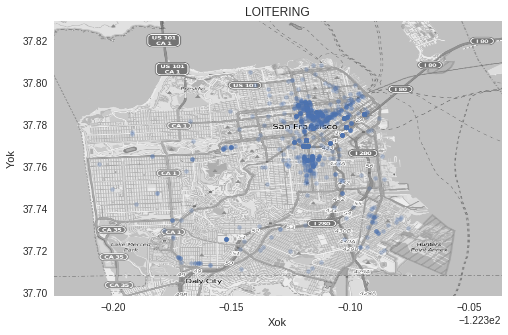

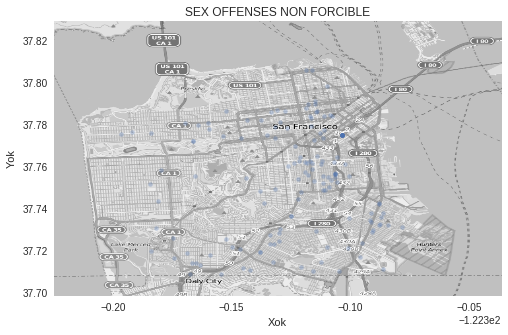

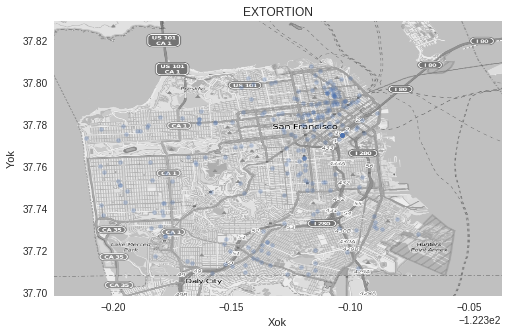

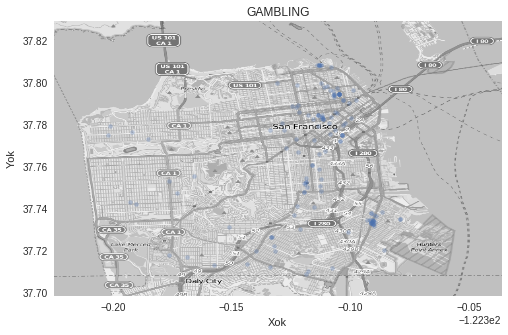

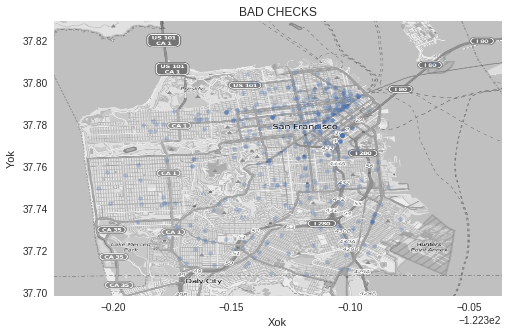

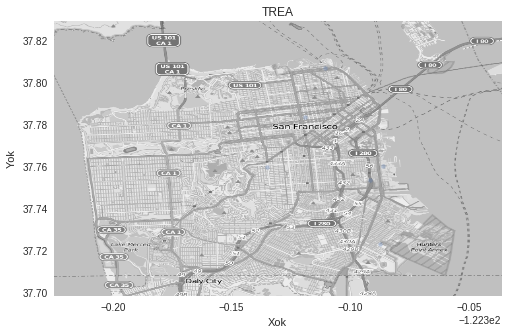

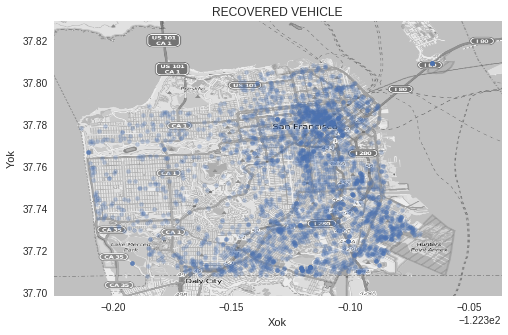

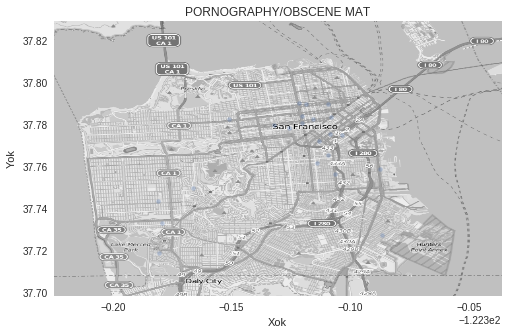

In [4]:
mapdata = np.loadtxt("sf_map_copyright_openstreetmap_contributors.txt")
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]
lon_lat_box=[-122.52469, -122.33663, 37.69862, 37.82986]

crimeData['Xok'] = crimeData[crimeData.X<-121].X
crimeData['Yok'] = crimeData[crimeData.Y<40].Y

for cat in crimeData.Category.unique():

    crimeDataS = crimeData[crimeData.Category == cat]
    plt.figure()
    plt.grid(False)
    
    #ax = sns.kdeplot(crimeDataS.Xok, crimeDataS.Yok, clip=clipsize, aspect=1/asp)

    cmap = plt.get_cmap('gray')

    g = sns.regplot(x="Xok", y="Yok", data=crimeDataS, fit_reg=False, scatter_kws={'alpha':0.3})
    g.set_title(cat)
    g.imshow(mapdata, cmap=plt.get_cmap('gray'), 
                  extent=lon_lat_box, 
                  aspect=asp)

Function display a map of a given type of crime at a given hour

In [5]:
def image_display(crime, time):
    #print crime,time
    crimeDataS = crimeData[crimeData.Category == crime][crimeData.Hour==time]
    plt.figure()
    plt.grid(False)
    
    #ax = sns.kdeplot(crimeDataS.Xok, crimeDataS.Yok, clip=clipsize, aspect=1/asp)

    cmap = plt.get_cmap('gray')

    g = sns.regplot(x="Xok", y="Yok", data=crimeDataS, fit_reg=False, scatter_kws={'alpha':0.3})
    g.set_title(cat)
    g.imshow(mapdata, cmap=plt.get_cmap('gray'), 
                  extent=lon_lat_box, 
                  aspect=asp)

Create Widgets to control map. By selecting the hour and crime type you can see a map of the crime locations. 

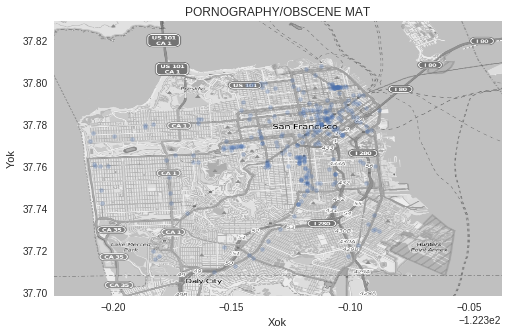

In [6]:
vals = list(zip(crimeData.Category.unique(), crimeData.Category.unique()))
crime = widgets.Select(options=vals, description='Select one of the values:')
time = widgets.IntSlider(min=0, max=23, value=2003)
widgets.interact(image_display, crime = crime, time=time)